# 아파트 실거래가 예측 대회

In [1]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import time


import pandas_profiling as pp
import plotly.express as px
%matplotlib inline

In [2]:
# 폰트설정 (맥)
from matplotlib import font_manager
plt.rcParams["font.family"] = 'NanumGothicCoding'
from matplotlib import rc
rc('font', family="Arial Unicode MS")
plt.rcParams['font.family'] = 'AppleGothic'

In [25]:
# 폰트 설정 (윈도우)
from matplotlib import rc

rc('font', family='Malgun Gothic')

# Data 불러오기

## 부동산(Train) Data

 <img src="./datas/data_source.png" style="width:100%;">

 <img src="./datas/csv.png" style="width:100%;">

In [4]:
train = pd.read_csv('datas/train.csv')

In [5]:
test = pd.read_csv('datas/test.csv')

In [6]:
train['P/m^2'] = train['transaction_real_price']/train['exclusive_use_area'] # 평당가격 column 추가

In [7]:
train['year'] =  round(train['transaction_year_month'] / 100)
train['month'] = train['transaction_year_month'] % 100

In [8]:
train = train[['transaction_id', 'apartment_id', 'city',  'dong', 'jibun', 'apt',
               'addr_kr', 'exclusive_use_area', 'year_of_completion',
               'transaction_year_month','year', 'month', 'transaction_date', 'floor', 'P/m^2',
               'transaction_real_price']]

In [9]:
train.head()

transaction_id  apartment_id   city dong   jibun       apt  \
0               0          7622  서울특별시  신교동    6-13  신현(101동)   
1               1          5399  서울특별시  필운동     142    사직파크맨션   
2               2          3578  서울특별시  필운동   174-1    두레엘리시안   
3               3         10957  서울특별시  내수동      95     파크팰리스   
4               4         10639  서울특별시  내수동  110-15      킹스매너   

             addr_kr  exclusive_use_area  year_of_completion  \
0  신교동 6-13 신현(101동)               84.82                2002   
1     필운동 142 사직파크맨션               99.17                1973   
2   필운동 174-1 두레엘리시안               84.74                2007   
3       내수동 95 파크팰리스              146.39                2003   
4    내수동 110-15 킹스매너              194.43                2004   

   transaction_year_month    year  month transaction_date  floor       P/m^2  \
0                  200801  2008.0      1            21~31      2  442.112709   
1                  200801  2008.0      1             1~10      6  201.673893   
2                  200801  2008.0      1             1~10      6  454.330895   
3                  200801  2008.0      1            11~20     15  806.065988   
4                  200801  2008.0      1            21~31      3  617.188705   

   transaction_real_price  
0                   37500  
1                   20000  
2                   38500  
3                  118000  
4                  120000

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1216553 non-null  int64  
 1   apartment_id            1216553 non-null  int64  
 2   city                    1216553 non-null  object 
 3   dong                    1216553 non-null  object 
 4   jibun                   1216553 non-null  object 
 5   apt                     1216553 non-null  object 
 6   addr_kr                 1216553 non-null  object 
 7   exclusive_use_area      1216553 non-null  float64
 8   year_of_completion      1216553 non-null  int64  
 9   transaction_year_month  1216553 non-null  int64  
 10  year                    1216553 non-null  float64
 11  month                   1216553 non-null  int64  
 12  transaction_date        1216553 non-null  object 
 13  floor                   1216553 non-null  int64  
 14  P/

## 공원 Data

In [11]:
park = pd.read_csv('datas/park.csv')
park.tail(50)

city   gu  dong   park_name park_type  park_area  \
1309  부산광역시  사상구   모라동    모라벤처타워공원       소공원      735.8   
1310  부산광역시  사상구   주례동        주감공원       소공원     1250.0   
1311  부산광역시  사상구   덕포동        문화공원      문화공원     3160.0   
1312  서울특별시  구로구  신도림동   미래사랑어린이공원     어린이공원     5870.0   
1313  서울특별시  구로구  신도림동    신도림역문화공원      문화공원     3322.0   
1314  서울특별시  구로구  신도림동    신도림어린이공원     어린이공원     2292.0   
1315  서울특별시  구로구   구로동     희망어린이공원     어린이공원      911.0   
1316  서울특별시  구로구   구로동    꿈마을어린이공원     어린이공원     1609.0   
1317  서울특별시  구로구   구로동    구로리어린이공원     어린이공원     7782.0   
1318  서울특별시  구로구   구로동     솔길어린이공원     어린이공원     1999.0   
1319  서울특별시  구로구   구로동     화원어린이공원     어린이공원     4544.0   
1320  서울특별시  구로구   구로동     삼각어린이공원     어린이공원     2634.0   
1321  서울특별시  구로구   구로동      구로근린공원      근린공원     7901.0   
1322  서울특별시  구로구   구로동     환경어린이공원     어린이공원      528.0   
1323  서울특별시  구로구   구로동     애경어린이공원     어린이공원     2996.0   
1324  서울특별시  구로구   구로동     테크노근린공원      근린공원    10482.0   
1325  서울특별시  구로구   구로동  구로동(다울)소공원       소공원      243.0   
1326  서울특별시  구로구   고척동    도레미어린이공원     어린이공원      326.0   
1327  서울특별시  구로구   고척동      계남근린공원      근린공원   158814.0   
1328  서울특별시  구로구   고척동      고척근린공원      근린공원   108120.0   
1329  서울특별시  구로구   고척동     골목어린이공원     어린이공원      266.0   
1330  서울특별시  구로구   고척동     능골어린이공원     어린이공원      357.0   
1331  서울특별시  구로구   고척동     오금어린이공원     어린이공원      348.0   
1332  서울특별시  구로구   고척동      덕의근린공원      근린공원     5565.0   
1333  서울특별시  구로구   고척동       현화소공원       소공원      720.0   
1334  서울특별시  구로구   고척동      무궁화소공원       소공원     1166.0   
1335  서울특별시  구로구   개봉동     개웅어린이공원     어린이공원     1797.0   
1336  서울특별시  구로구   개봉동    소막골어린이공원     어린이공원      516.0   
1337  서울특별시  구로구   개봉동     절골어린이공원     어린이공원      369.0   
1338  서울특별시  구로구   개봉동    가린열어린이공원     어린이공원      333.0   
1339  서울특별시  구로구   개봉동       개봉소공원       소공원     3023.0   
1340  서울특별시  구로구   개봉동       개웅소공원       소공원      657.0   
1341  서울특별시  구로구   오류동    온수도시자연공원        기타  1097565.0   
1342  서울특별시  구로구   오류동     개웅산근린공원      근린공원   411972.0   
1343  서울특별시  구로구   오류동   오동나무어린이공원     어린이공원     1815.0   
1344  서울특별시  구로구   온수동     온수어린이공원     어린이공원      475.0   
1345  서울특별시  구로구   온수동       와룡소공원       소공원     2500.0   
1346  서울특별시  구로구   온수동       갈매소공원       소공원     3200.0   
1347  서울특별시  구로구    궁동     삭새어린이공원     어린이공원     2077.0   
1348  서울특별시  구로구    궁동     수른어린이공원     어린이공원      332.0   
1349  서울특별시  구로구   천왕동    천왕도시자연공원        기타   587860.0   
1350  서울특별시  구로구   천왕동      연지근린공원      근린공원    44478.0   
1351  서울특별시  구로구   천왕동     버들어린이공원     어린이공원     6167.0   
1352  서울특별시  구로구   천왕동      천왕근린공원      근린공원    33677.0   
1353  서울특별시  구로구   천왕동      천왕역소공원       소공원     1712.0   
1354  서울특별시  구로구   천왕동   이펜시아어린이공원     어린이공원     1500.0   
1355  서울특별시  구로구   천왕동       개명소공원       소공원     5415.0   
1356  서울특별시  구로구   천왕동     봉화대근린공원      근린공원    60975.0   
1357  서울특별시  구로구    항동       푸른수목원      근린공원   100809.0   
1358  서울특별시  구로구   오류동    오류동역문화공원      문화공원     7510.0   

                                 park_exercise_facility  \
1309                                                NaN   
1310                                                NaN   
1311                                                NaN   
1312                                          체력단련시설 5점   
1313                                                NaN   
1314                                          체력단련시설 6점   
1315                                          체력단련시설 3점   
1316                                          체력단련시설 6점   
1317                                          체력단련시설 9점   
1318                                          체력단련시설 5점   
1319                                          체력단련시설 5점   
1320                                          체력단련시설 3점   
1321                                          체력단련시설 5점   
1322                                          체력단련시설 2점   
1323                                          체력단련시설 6점   
1324                                          체력단련시설 

In [12]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   city                         1359 non-null   object 
 1   gu                           1356 non-null   object 
 2   dong                         1359 non-null   object 
 3   park_name                    1359 non-null   object 
 4   park_type                    1359 non-null   object 
 5   park_area                    1359 non-null   float64
 6   park_exercise_facility       277 non-null    object 
 7   park_entertainment_facility  435 non-null    object 
 8   park_benefit_facility        266 non-null    object 
 9   park_cultural_facitiy        72 non-null     object 
 10  park_facility_other          175 non-null    object 
 11  park_open_year               937 non-null    float64
 12  reference_date               1359 non-null   object 
dtypes: float64(2), obj

## 어린이집 Data

In [13]:
day_care = pd.read_csv('datas/day_care_center.csv')
day_care.tail()

city   gu day_care_name day_care_type  day_care_baby_num  teacher_num  \
7546  부산광역시  금정구      해바라기어린이집            민간                 46         13.0   
7547  부산광역시  금정구        해수어린이집            가정                 19          6.0   
7548  부산광역시  금정구   행복한그림동산어린이집            민간                 92         16.0   
7549  부산광역시  금정구       행복한어린이집            민간                 43         12.0   
7550  부산광역시  금정구        혜인어린이집            민간                 32          7.0   

      nursing_room_num  playground_num  CCTV_num is_commuting_vehicle  \
7546               NaN             NaN       NaN                    y   
7547               NaN             NaN       NaN                    y   
7548               NaN             NaN       NaN                    y   
7549               NaN             NaN       NaN                    y   
7550               NaN             NaN       NaN                    y   

     reference_date  
7546     2019-01-21  
7547     2019-01-21  
7548     2019-01-21  
7549     2019-01-21  
7550     2019-01-21

In [14]:
day_care.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7551 entries, 0 to 7550
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  7551 non-null   object 
 1   gu                    7551 non-null   object 
 2   day_care_name         7551 non-null   object 
 3   day_care_type         7551 non-null   object 
 4   day_care_baby_num     7551 non-null   int64  
 5   teacher_num           7326 non-null   float64
 6   nursing_room_num      4352 non-null   float64
 7   playground_num        3626 non-null   float64
 8   CCTV_num              5280 non-null   float64
 9   is_commuting_vehicle  7055 non-null   object 
 10  reference_date        7551 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 649.0+ KB


## Pandas Profiling

In [9]:
train.profile_report()

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# Data 탐색

## scatter을 이용한 탐색

In [14]:
seoul = pd.read_csv('datas/seoul.csv')
busan = pd.read_csv('datas/busan.csv')
seoulgroupby = seoul.groupby('dong').mean()
seoulcount = seoul.groupby('dong').count()[['transaction_id']].rename(columns={'transaction_id' : 'count'})
seoulcount = seoulcount.reset_index()
seoulgroupby= seoulgroupby.merge(seoulcount, on='dong')

In [15]:
fig = px.scatter(seoulgroupby, 
                 size=seoulgroupby['transaction_real_price'],
                 x=seoulgroupby['lat'], 
                 y=seoulgroupby['loc'],
                 color=seoulgroupby['dong'], 
                 #range_x=(126.8,127.2),
                 #range_y=(37.4,37.8)
                )
                 

fig.show();

In [16]:
fig = px.scatter(seoulgroupby, 
                 size=seoulgroupby['count'],
                 x=seoulgroupby['lat'], 
                 y=seoulgroupby['loc'],
                 color=seoulgroupby['transaction_real_price'], 
                 #range_x=(126.8,127.2),
                 #range_y=(37.4,37.8)
                )
                 

fig.show();

In [17]:
busangroupby = busan.groupby('dong').mean()
busancount = busan.groupby('dong').count()[['transaction_id']].rename(columns={'transaction_id' : 'count'})
busancount = busancount.reset_index()
busangroupby= busangroupby.merge(busancount, on='dong')

In [18]:
fig = px.scatter(busangroupby, 
                 size=busangroupby['transaction_real_price'],
                 x=busangroupby['lat'], 
                 y=busangroupby['loc'],
                 color=busangroupby['dong'], 
                
                )
                 

fig.show();

In [19]:
fig = px.scatter(seoulgroupby, 
                 size=busangroupby['count'],
                 x=busangroupby['lat'], 
                 y=busangroupby['loc'],
                 color=busangroupby['transaction_real_price'], 

                )
                 

fig.show();

In [20]:
# 위에는 실거래가, 아래는 거래량으로 그린 그래프
# X, Y는 위도 경도
# 가격은 중심부를 중심으로 형성 되어 있고, 거래량은 외각쪽에서 더 많음을 알 수 있음.

## 동별 실가격 정보 내림차순으로 정렬

In [12]:
df1 = pd.DataFrame(train, columns=['city', 'dong', 'transaction_real_price','transaction_id','apartment_id','jibun',
                                  'apt','addr_kr', 'exclusive_use_area', 'year_of_completion', 'transaction_year_month',
                                   'year','month','transaction_date', 'floor', 'P/m^2'])

In [46]:
dong = df1.groupby(['dong'], as_index=False).count()
dong = dong.sort_values(by="transaction_real_price", ascending=False)
dong = dong["dong"].head(20)
count = df1.groupby(["dong"])["transaction_real_price"].agg(['count','mean'])
count = count.sort_values(by="count", ascending=False).head(20)
#count = count["count"]

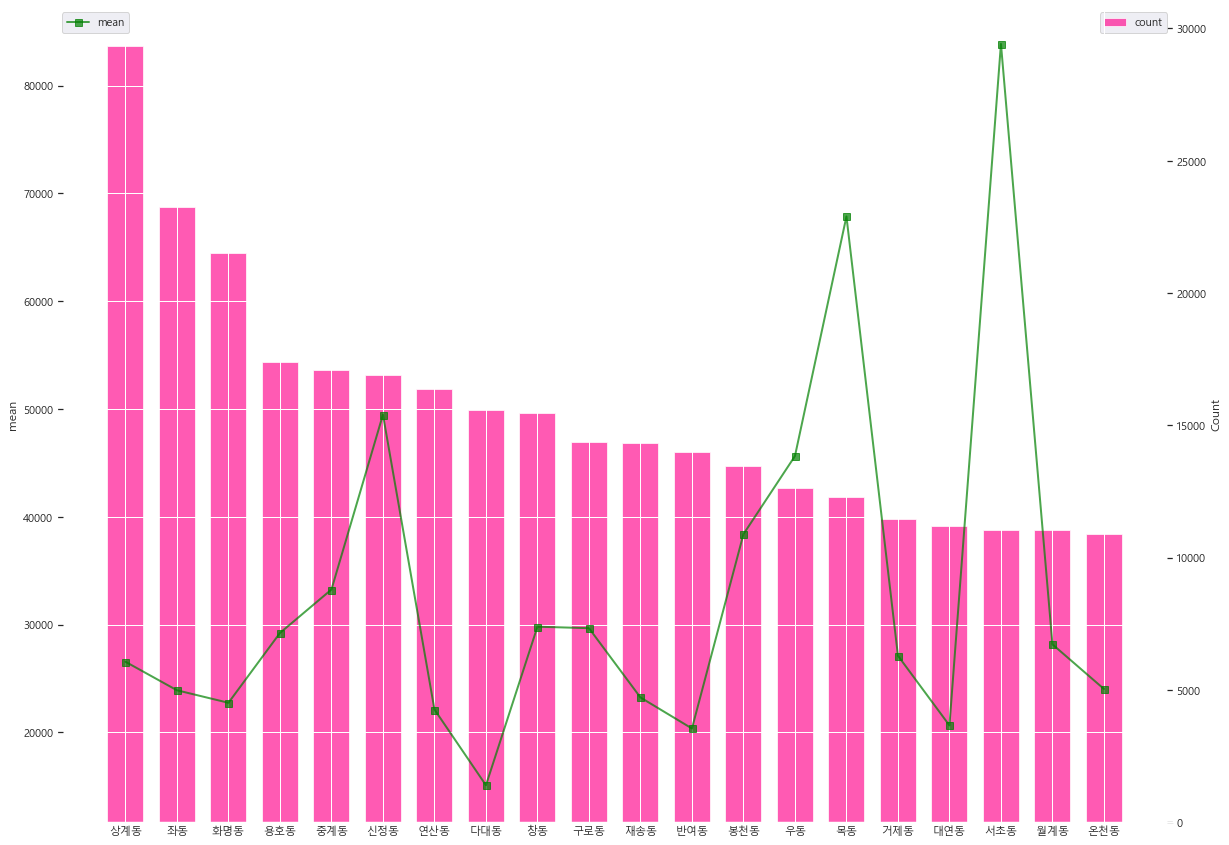

In [26]:
#sns.set(font="AppleGothic", 
#        rc={"axes.unicode_minus":False})

plt.rcParams['figure.figsize'] = (20, 15)
plt.rcParams['font.size'] = 12

x= dong
y = count["mean"]
y1 = count["count"]

fig, ax1 = plt.subplots()

ax1.plot(x, y,'-s', color='green',label='mean', markersize=7, linewidth=2, alpha=0.7)
ax1.tick_params(axis='both', direction='in')
ax1.set_ylabel('mean')

ax2 = ax1.twinx()

ax2.bar(x, y1,color='deeppink', label='count', alpha=0.7, width=0.7)
ax2.tick_params(axis='y', direction='in')
ax2.set_ylabel(r'Count')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [23]:
# 서울과, 부산 Data에서 거래량을 기준으로 count해 sort_value를 해본 상태이다.
# 좌측부터 순서대로 상계동, 좌동, 화명동, 용호동, 중계동 순으로 거래량이 Counting 된 모습을 볼 수 있다.
# 추가적으로 평균가격을 Plot로 추가해 표현해 보았다.
# 위 그래프를 보았을때 거래량과 평균 집 가격에는 상관관계가 없다는 것을 확인 할 수 있다.

## Heatmap을 이용해 상관관계 분석

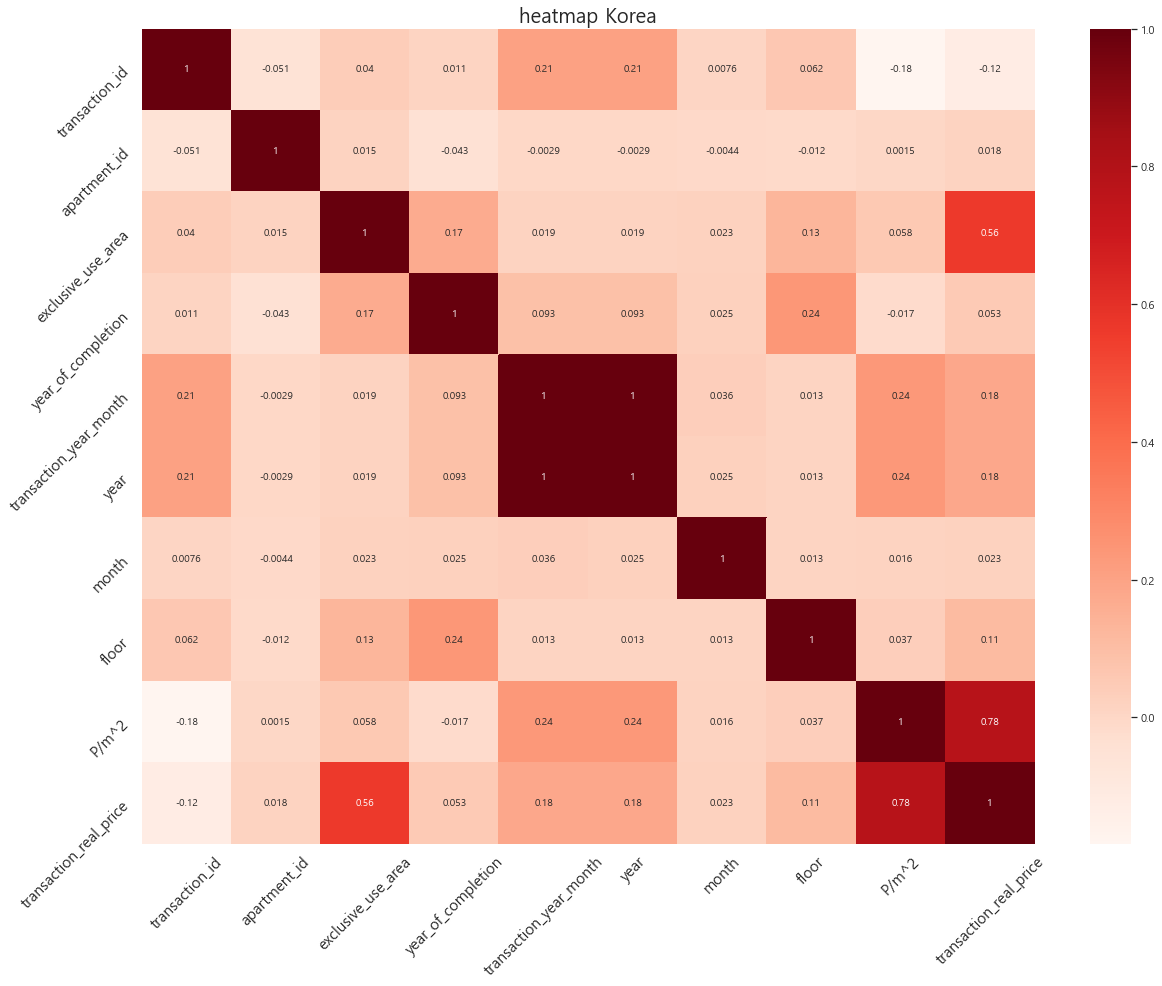

In [24]:
fig = plt.figure(figsize=(20, 15))
fig.set_facecolor('white')

sns.heatmap(train.corr(), cmap="Reds", annot=True)
plt.title('heatmap Korea', fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=45, fontsize=15)
plt.show()

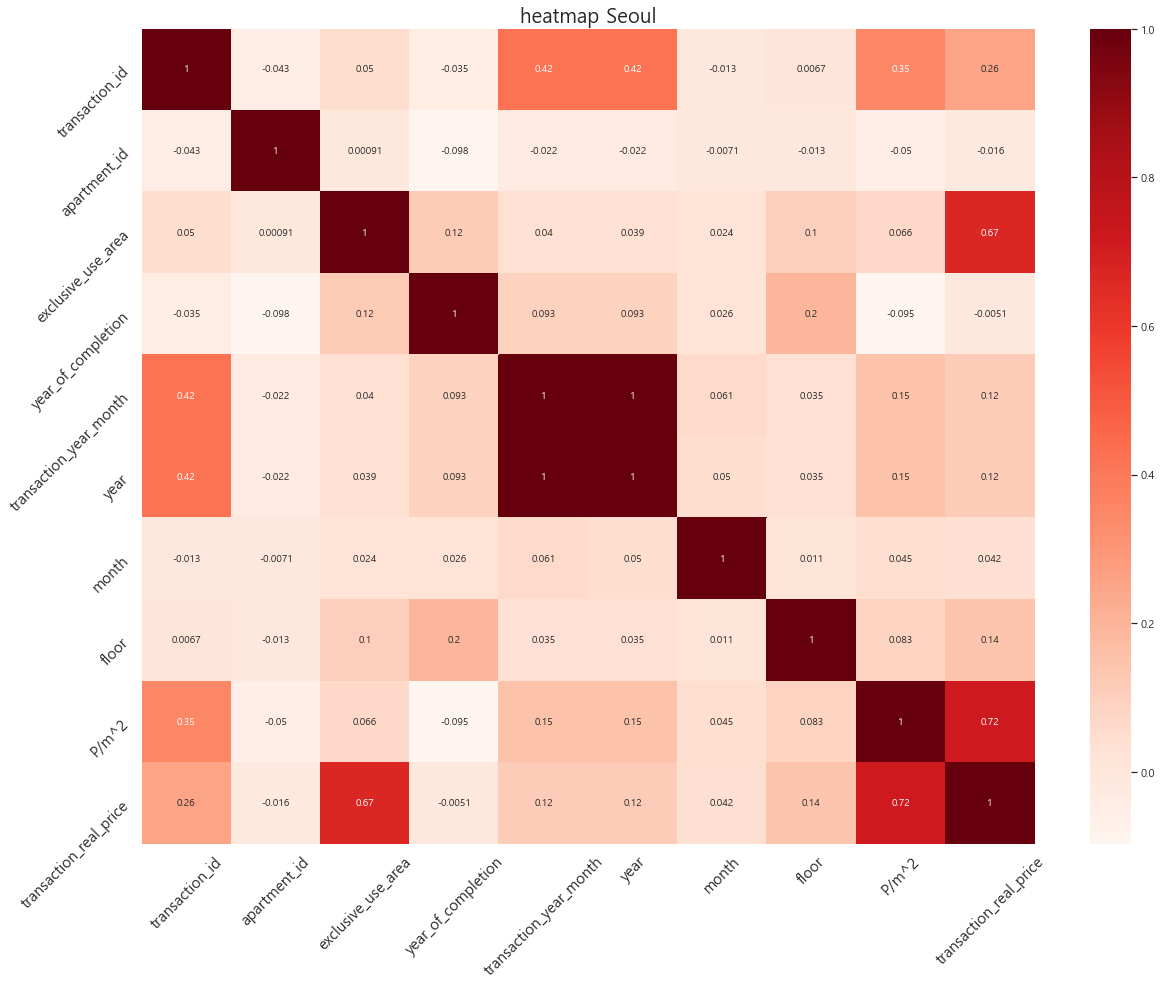

In [25]:
fig = plt.figure(figsize=(20, 15))
fig.set_facecolor('white')

sns.heatmap(train[train['city'] == '서울특별시'].corr(), cmap="Reds", annot=True)
plt.title('heatmap Seoul', fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=45, fontsize=15)
plt.show()

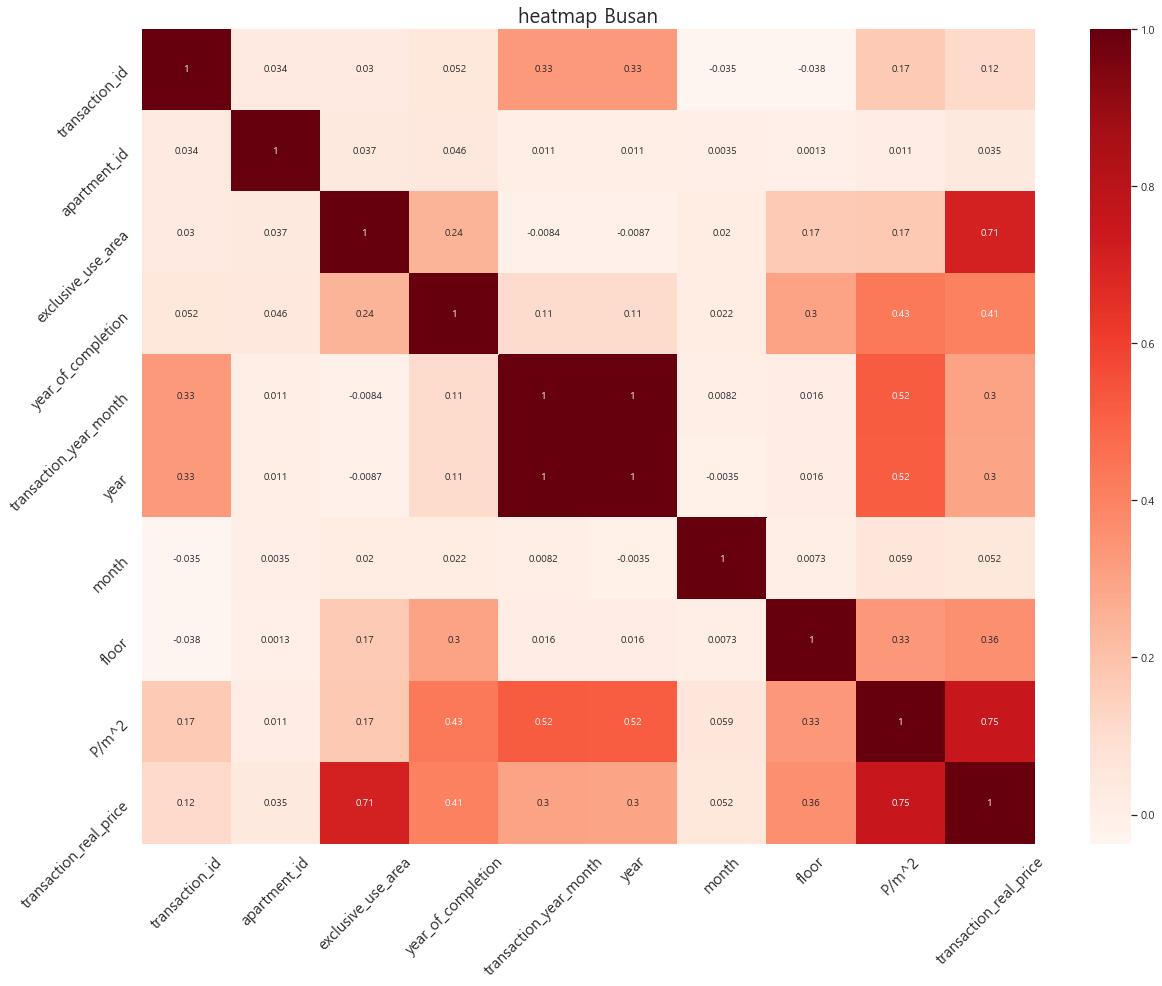

In [26]:
fig = plt.figure(figsize=(20, 15))
fig.set_facecolor('white')

sns.heatmap(train[train['city'] == '부산광역시'].corr(), cmap="Reds", annot=True)
plt.title('heatmap Busan', fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=45, fontsize=15)
plt.show()

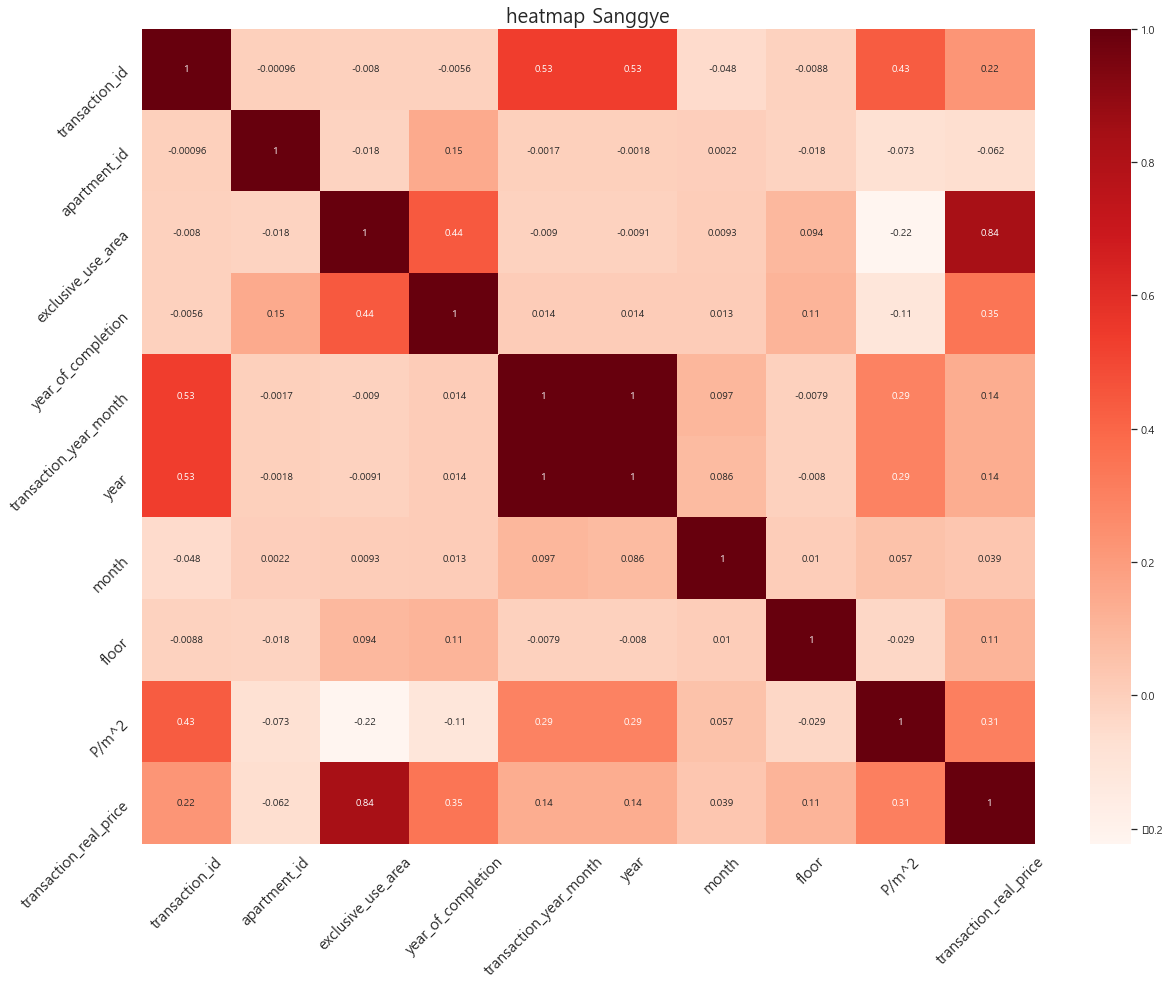

In [27]:
fig = plt.figure(figsize=(20, 15))
fig.set_facecolor('white')

sns.heatmap(train[train['dong'] == '상계동'].corr(), cmap="Reds", annot=True)
plt.title('heatmap Sanggye', fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=45, fontsize=15)
plt.show()

In [28]:
# 넓은 지역 (국내, 서울,부산)의 상관계수는 넓이당 가격이 가장 높았지만, 범위를 좁힌 동으로 했을 때는 넓이당 가격이 평준화 되면서 평수가 중요함을 알게 되었다.
# 평당 가격을 잘 이용하기 위해서는 좁은 범위인, 동이나 아파트ID를 이용해야 함을 명확히 할 수 있었다.

## 대략적 서울 집 값 분포를 확인해보자

In [29]:
# 월별 거래량을 count로 정리해  max, min을 출력한다음, (max - min) / max 로 스케일링을 진행하였다,
# 어느 동의데이터가 거래량의 감소폭이 적고 꾸준한 거래량을 보이는 지역인지 확인을 하고 싶어서 데이터 변환을 진행하였다.
# 이 변환을 통해서 예상되는 결과는 
# 가설 : 대치동과 같이 꾸준히 거래가 되는 지역이 있을 것이다. 대치동은 교육열이 높은 곳으로 유사한 값이 나온 지역도 교육열이 높을 것이다.

In [30]:
df2 = train.groupby(["dong", "month"]).size().reset_index(name="Count")
df2 = df2.pivot("dong", "month", "Count")
df2.replace(np.NaN, 0, inplace=True)
list = []
for idx, idxn in zip(df2.index,range(len(df2.index))) :
    list.append( [idx, max(df2.loc[df2.index[idxn]]), min(df2.loc[df2.index[idxn]])])
list = pd.DataFrame(list)
list.columns = ['dong', 'max', 'min']
list['max-min'] = (list['max'] - list['min']) / list['max']
list_sort = list.sort_values(by=['max-min'], ascending=True).head(20)
list_sort

dong     max     min   max-min
100      대치동   732.0   548.0  0.251366
404      천연동    68.0    50.0  0.264706
106      도곡동   620.0   441.0  0.288710
365      잠원동   816.0   576.0  0.294118
339       우동  1252.0   875.0  0.301118
382  정관읍 용수리   506.0   352.0  0.304348
23       광장동   441.0   304.0  0.310658
167      민락동   288.0   198.0  0.312500
233      서초동  1103.0   752.0  0.318223
338      용호동  1767.0  1203.0  0.319185
77       다대동  1582.0  1073.0  0.321745
31       구서동   981.0   659.0  0.328236
0        가락동   928.0   620.0  0.331897
92       대방동   311.0   205.0  0.340836
171      방배동   691.0   455.0  0.341534
13       개포동   988.0   649.0  0.343117
158    문래동3가   154.0   101.0  0.344156
375      재송동  1491.0   966.0  0.352113
300      역삼동   591.0   380.0  0.357022
53       낙민동   397.0   254.0  0.360202

In [31]:
# 결과를 확인해보니 대치동에서 max - min의 차이가 적은 것으로 확인 되었으며, 천연동은 서대문구에 위치하고 있으며 거래량이 적어 넘어 가도록 하겠습니다.
# 도곡동, 잠원동, 우동은 예상이 되는 지역이며 정관읍 용수리는 부산의 신도시로 신규아파트 입주로 인해 많은 거래가 있는 것으로 확인이 되었습니다.
# 전체 데이터 중 20의 데이터를 정렬해 확인해보았으며, 초기에 정해놓은 가설과 유사한 모습을 보였으며,
# 전통적으로 교육열이 높은 곳과 더불어 신도시가 거래량이 꾸준한 모습을 보였습니다.
# 해당 자료를 이용해 부동산 영업을 진행한다면 꾸준한 수익이 가능 할 것으로 보입니다.

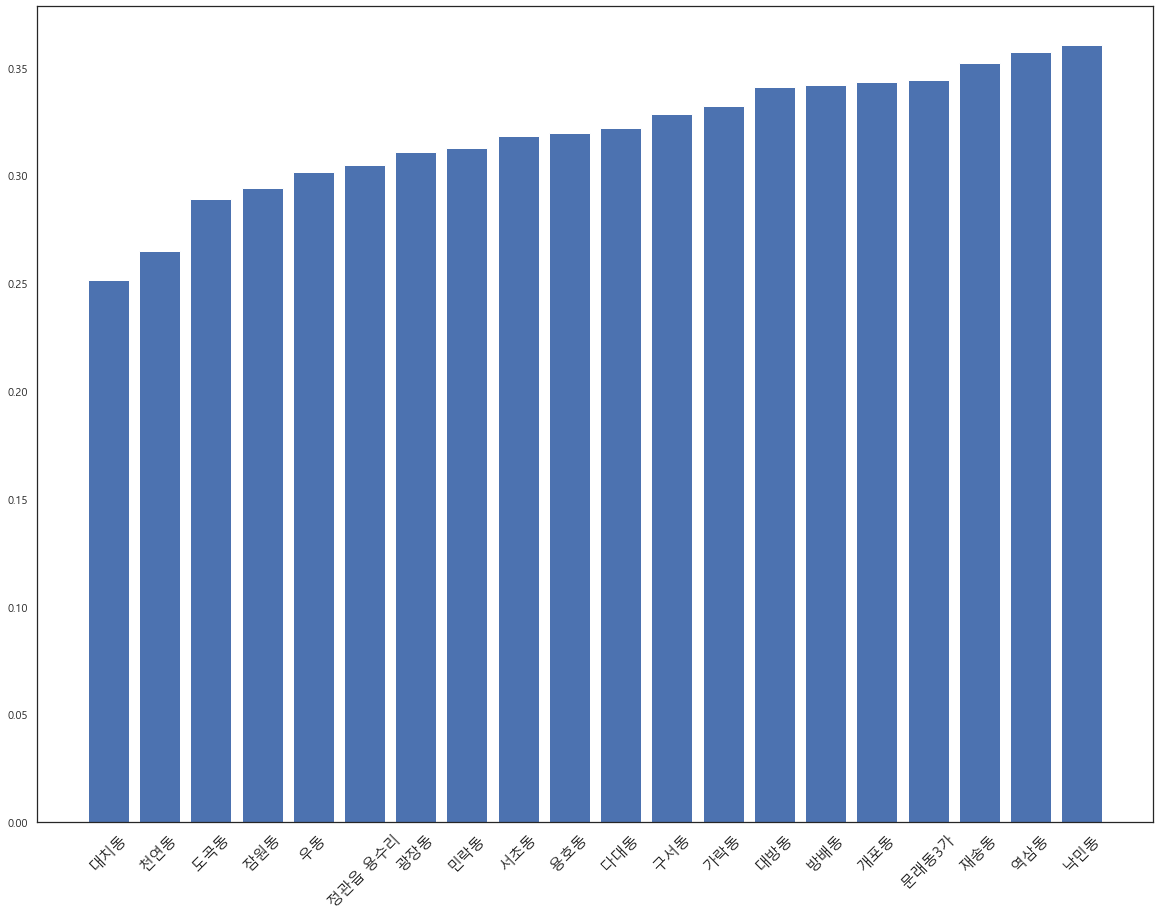

In [32]:
fig = plt.figure(figsize=(20, 15))
fig.set_facecolor('white')

plt.bar(list_sort['dong'], list_sort['max-min'])
plt.xticks(rotation=45, fontsize=15)

plt.show()

In [33]:
s_pivot = pd.pivot_table(df1, index=["city","dong"],values=["transaction_real_price"], aggfunc = ['mean','median','min','max','sum','count'])

In [34]:
seoul_count = s_pivot.xs('서울특별시')['mean']
seoul_count.sort_values(by="transaction_real_price",ascending=False).head(50)

transaction_real_price
dong                          
장충동1가            269888.888889
압구정동             164534.722914
청암동              161403.700000
용산동5가            153497.331633
회현동2가            139906.140351
반포동              132489.395651
한남동              122593.293264
서빙고동             116547.239777
대치동              116320.538909
남대문로5가           113153.604651
도곡동              110655.655354
청담동              110289.411168
교남동              108600.000000
내수동              107899.014778
주성동              106000.000000
하중동              105900.477833
삼성동              101379.971621
잠실동              101166.337275
동자동               99472.876033
동빙고동              99057.552239
회현동1가             98753.660066
한강로3가             96027.903297
여의도동              93456.214326
사직동               93144.310145
이촌동               89409.952902
서교동               88442.874302
견지동               87004.741935
잠원동               86980.647308
방배동               85883.661956
신천동               85334.022796
신계동               84490.522184
자곡동               83905.484615
서초동               83858.755537
한강로1가             82761.069620
원효로1가             81194.484429
방이동               80720.686653
내곡동               79034.412121
상수동               77964.221557
일원동               77417.897626
상왕십리동             77258.186364
신원동               77225.606936
개포동               76837.592581
이태원동              76104.961468
흥인동               74039.456432
율현동               72818.500000
평창동               72542.103448
한강로2가             70816.625418
역삼동               70325.778541
우면동               69677.365014
논현동               69673.041071

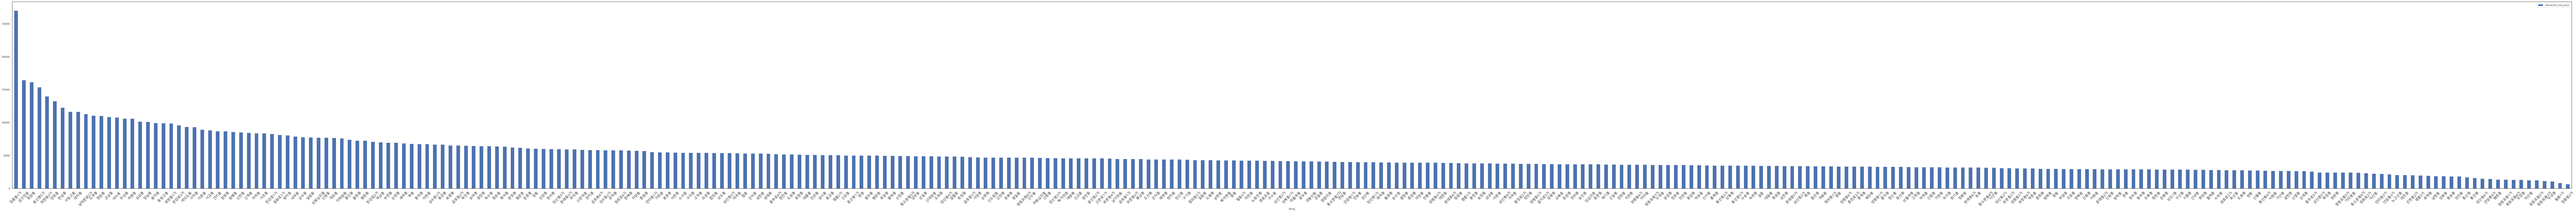

In [35]:
#fig.set_facecolor('white')
seoul_count.sort_values(by="transaction_real_price",ascending=False).plot(kind='bar', figsize=(200,15))
#fig.set_facecolor('white')
plt.xticks(rotation=45, fontsize=15)
plt.show()

In [36]:
# pivot을 활용하여 서울 지역 집가격의 평균을 구해 bar chart로 표현해 보았다.
# 상위 지역 중 낯선 지역이 보인다. 청암동이 발견되었는데 해당지역은 서대문에 위치해 있으며
# 해당 동 자체에 아파트가 많이 있지 않은것으로 보이고 상대적으로 표본은 적은 상태에서 비교적 높은 시세를 유지한 것으로 보인다.

In [37]:
busan_count = s_pivot.xs('부산광역시')['max']
busan_count.sort_values(by="transaction_real_price",ascending=False).head(50)

transaction_real_price
dong                           
우동                       412787
재송동                      220000
온천동                      199330
남천동                      179400
용호동                      178350
범일동                      177000
중동                       166300
부전동                      145000
민락동                      132500
거제동                      126000
사직동                      126000
좌동                       123000
대교동1가                    120000
대연동                      115000
명지동                      115000
구서동                      110000
광안동                      109500
연산동                      105000
명륜동                       90000
화명동                       84500
장전동                       80000
암남동                       76000
동대신동2가                    75000
연지동                       74500
청룡동                       71500
수영동                       68000
망미동                       67750
토성동1가                     64500
전포동                       62500
당리동                       62300
반여동                       60000
개금동                       59900
부곡동                       58000
안락동                       58000
초읍동                       57700
낙민동                       57000
양정동                       56500
정관읍 용수리                   56500
다대동                       55500
구포동                       55300
서대신동3가                    55200
하단동                       54650
정관읍 모전리                   54000
복천동                       52750
가야동                       52500
영선동2가                     52000
범천동                       51400
만덕동                       50500
문현동                       50000
용당동                       50000

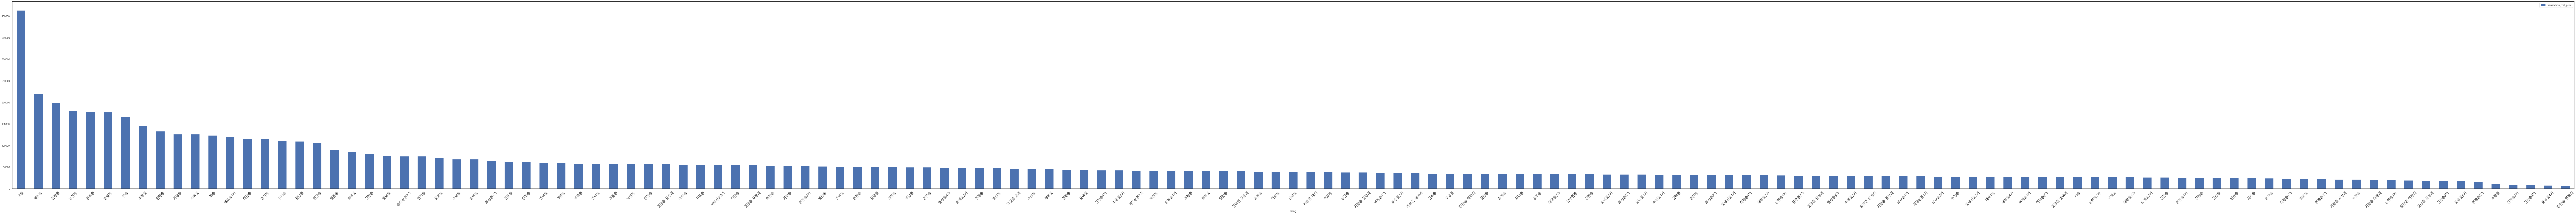

In [38]:
busan_count.sort_values(by="transaction_real_price",ascending=False).plot(kind='bar', figsize=(200,15))
plt.xticks(rotation=45, fontsize=15)
#fig.set_facecolor('white')
plt.show()

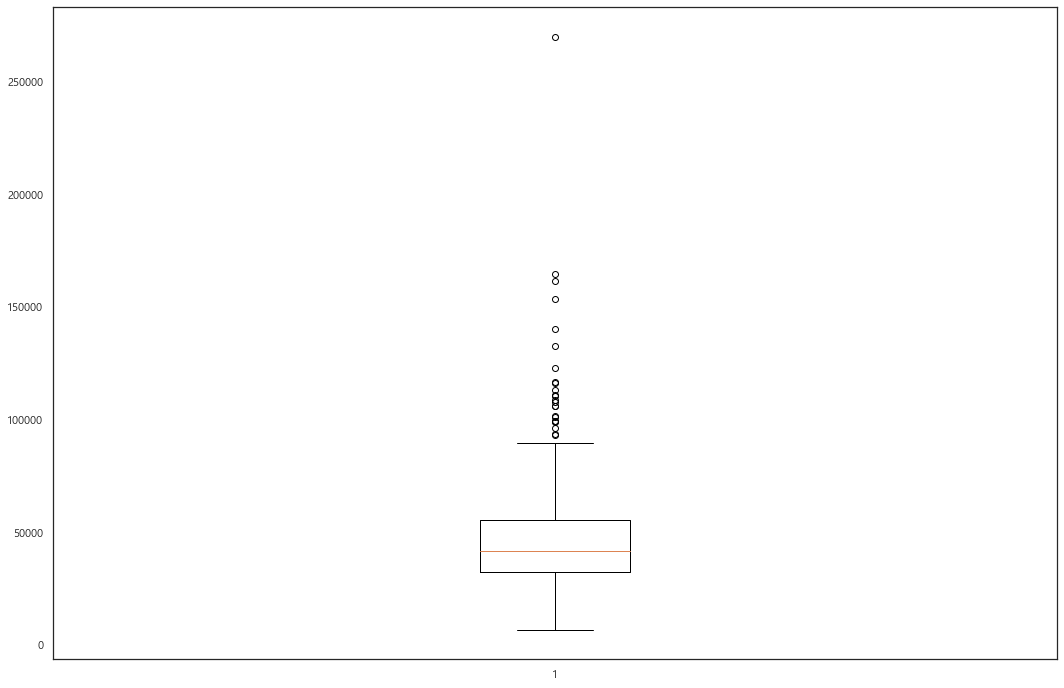

In [39]:
plt.figure(figsize=(18,12))
plt.boxplot(s_pivot.xs('서울특별시')["mean"])
plt.show()

 <img src="./datas/pieris.png" style="width:30%;">

## 동별 아파트 가격에 대한 대략적인 시각화

In [40]:
groupby_min = pd.DataFrame(df1.groupby("dong").transaction_real_price.min())
groupby_min.rename(columns={'transaction_real_price' : 'min'}, inplace=True)

In [41]:
groupby_max = pd.DataFrame(df1.groupby("dong").transaction_real_price.max())
groupby_max.rename(columns={'transaction_real_price' : 'max'}, inplace=True)

In [42]:
groupby_mean = pd.DataFrame(df1.groupby("dong").transaction_real_price.mean())
groupby_mean.rename(columns={'transaction_real_price' : 'mean'}, inplace=True)

In [43]:
groupby_std = pd.DataFrame(df1.groupby("dong").transaction_real_price.std())
groupby_std.rename(columns={'transaction_real_price' : 'std'}, inplace=True)

In [44]:
groupby_count = pd.DataFrame(df1.groupby("dong").transaction_real_price.count())

In [45]:
groupby_df1 = pd.concat([groupby_max, groupby_mean, groupby_min], axis=1)

In [46]:
groupby_df1['count'] = groupby_count

In [47]:
groupby_df1['Score_squareroot']=np.sqrt((groupby_df1['count']))

In [48]:
groupby_std = pd.DataFrame(df1.groupby("dong").transaction_real_price.std())
groupby_std.rename(columns={'transaction_real_price' : 'std'}, inplace=True)

In [49]:
groupby_df1['Score_squareroot']=np.sqrt((groupby_df1['count']))

In [50]:
groupby_df1 = pd.concat([groupby_max, groupby_mean, groupby_min, groupby_std], axis=1)

In [51]:
groupby_df1['sort'] = groupby_df1['max'] - groupby_df1['min']

In [52]:
groupby_count = pd.DataFrame(df1.groupby("dong").transaction_real_price.count())

In [53]:
groupby_df1['count'] = groupby_count
groupby_df1['Score_squareroot']=np.sqrt((groupby_df1['count']))

In [54]:
low = groupby_df1['mean'] - 1.96 * (groupby_df1['std']/(groupby_df1['Score_squareroot']))
high = groupby_df1['mean'] + 1.96 * (groupby_df1['std']/(groupby_df1['Score_squareroot']))

In [55]:
low_95 = pd.DataFrame(low)
high_95 = pd.DataFrame(high)

In [56]:
groupby_df1['low']=low_95
groupby_df1['high']=high_95

In [57]:
groupby_df1

max          mean    min           std    sort  count  \
dong                                                             
가락동   131500  54967.955681   1500  14630.303821  130000   9567   
가리봉동   32300  24241.186441  13000   3896.735630   19300     59   
가산동    58450  26812.244082   8889   9981.864532   49561   1225   
가야동    52500  20207.466579   2200  10164.129646   50300   3785   
가양동   115000  32263.930082  10000  14627.605091  105000   6622   
...      ...           ...    ...           ...     ...    ...   
효창동   123000  51399.878378  14500  18028.839663  108500    444   
후암동   120000  49870.036496   8000  20119.032876  112000    274   
휘경동    64500  34295.183976   9091  10218.115117   55409   2696   
흑석동   294994  63784.781627  16942  23233.503037  278052   2569   
흥인동   228977  74039.456432  13600  39864.459966  215377    241   

      Score_squareroot           low          high  
dong                                                
가락동          97.811042  54674.784329  55261.127033  
가리봉동          7.681146  23246.855375  25235.517506  
가산동          35.000000  26253.259668  27371.228495  
가야동          61.522354  19883.654291  20531.278867  
가양동          81.375672  31911.612180  32616.247983  
...                ...           ...           ...  
효창동          21.071308  49722.881081  53076.875676  
후암동          16.552945  47487.783454  52252.289539  
휘경동          51.923020  33909.468630  34680.899323  
흑석동          50.685304  62886.342381  64683.220873  
흥인동          15.524175  69006.381047  79072.531816  

[473 rows x 9 columns]

In [58]:
groupby_df1.sort_values(by = 'sort', inplace=True)

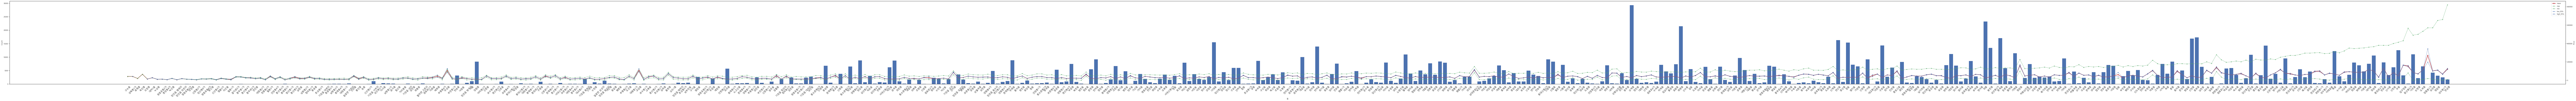

In [59]:
X = groupby_df1.index
y = groupby_df1

fig, ax1 = plt.subplots(figsize=(300,10))

fig.set_facecolor('white')

plt.xticks(rotation=45, fontsize=15)
ax1.set_xlabel('동')
ax1.set_ylabel('Count')
ax2 = ax1.twinx()
ax2.set_ylabel('Price')


ax2.plot(X, y['mean'],label='mean', color='r', marker='o',linewidth=3)
ax2.plot(X, y['max'], label='max', color='g', marker='*',linewidth=1)
ax2.plot(X, y['min'], label='min', color='g', marker='*',linewidth=1)
ax2.plot(X, y['low'], label='low_95%', color='b', marker='*',linewidth=1)
ax2.plot(X, y['high'], label='high_95%', color='b', marker='*',linewidth=1)
ax1.bar(X, y['count'])

plt.legend()

plt.show()

In [60]:
#신뢰구간 95%를 설정해 동별 가격을 보았을때 2곳에서 신뢰구간이 포함이 되지 않음을 발견했다.

In [61]:
groupby_df1.loc["주성동"].reset_index()

index            주성동
0               max  117000.000000
1              mean  106000.000000
2               min   95000.000000
3               std   15556.349186
4              sort   22000.000000
5             count       2.000000
6  Score_squareroot       1.414214
7               low   84440.000000
8              high  127560.000000

In [62]:
(groupby_df1.loc["주성동"]['max'])-(groupby_df1.loc["주성동"]['min']) > (groupby_df1.loc["주성동"]['high'])-(groupby_df1.loc["주성동"]['low'])

False

In [63]:
groupby_df1.loc["교남동"].reset_index()

index            교남동
0               max  124500.000000
1              mean  108600.000000
2               min   96500.000000
3               std   14381.585448
4              sort   28000.000000
5             count       3.000000
6  Score_squareroot       1.732051
7               low   92325.704030
8              high  124874.295970

In [64]:
(groupby_df1.loc["교남동"]['max'])-(groupby_df1.loc["교남동"]['min']) > (groupby_df1.loc["교남동"]['high'])-(groupby_df1.loc["교남동"]['low'])

False

In [65]:
meandata = train.groupby('dong').mean()
countdata = train.groupby('dong').count()
countdata = countdata['transaction_id'].rename('count')
countdata = pd.DataFrame(countdata)
meandata = pd.concat([meandata, countdata], axis=1)

In [66]:
meandata

transaction_id  apartment_id  exclusive_use_area  year_of_completion  \
dong                                                                         
가락동    647309.194627   4838.917320           67.629924         1991.382251   
가리봉동   457230.084746  11849.254237           76.268475         1998.423729   
가산동    469902.710204   3908.305306           60.743495         2002.240000   
가야동    743643.322589   5426.476618           81.036506         1995.665786   
가양동    454446.522803   2194.682573           60.368251         1994.691332   
...              ...           ...                 ...                 ...   
효창동    146612.481982  10750.851351           87.116227         2001.051802   
후암동    123478.627737   9103.759124           89.719964         1993.978102   
휘경동    174219.989985   8473.300445           74.881195         2002.077151   
흑석동    571856.094589  10637.010121           89.776874         2001.218373   
흥인동    150148.941909   7647.228216          116.209636         2011.062241   

      transaction_year_month         year     month      floor       P/m^2  \
dong                                                                         
가락동            201302.942511  2012.965820  6.360510   7.630710  898.943953   
가리봉동           201326.983051  2013.203390  6.644068   9.203390  319.878887   
가산동            201351.884898  2013.456327  6.252245  11.086531  562.429110   
가야동            201254.728137  2012.482959  6.432232   8.428005  243.199671   
가양동            201341.590607  2013.354123  6.178345   8.355029  543.557324   
...                      ...          ...       ...        ...         ...   
효창동            201365.923423  2013.601351  5.788288   6.819820  616.034638   
후암동            201288.565693  2012.821168  6.448905   3.251825  569.887120   
휘경동            201321.750000  2013.156528  6.097181  10.411350  464.836993   
흑석동            201417.384585  2014.111327  6.251849   7.821721  710.010455   
흥인동            201545.900415  2015.385892  7.311203  16.742739  682.372827   

      transaction_real_price  count  
dong                                 
가락동             54967.955681   9567  
가리봉동            24241.186441     59  
가산동             26812.244082   1225  
가야동             20207.466579   3785  
가양동             32263.930082   6622  
...                      ...    ...  
효창동             51399.878378    444  
후암동             49870.036496    274  
휘경동             34295.183976   2696  
흑석동             63784.781627   2569  
흥인동             74039.456432    241  

[473 rows x 11 columns]

In [67]:
meandata.drop(['transaction_id', 'apartment_id', 'transaction_year_month'], axis=1, inplace=True)

In [68]:
meandata

exclusive_use_area  year_of_completion         year     month  \
dong                                                                  
가락동            67.629924         1991.382251  2012.965820  6.360510   
가리봉동           76.268475         1998.423729  2013.203390  6.644068   
가산동            60.743495         2002.240000  2013.456327  6.252245   
가야동            81.036506         1995.665786  2012.482959  6.432232   
가양동            60.368251         1994.691332  2013.354123  6.178345   
...                  ...                 ...          ...       ...   
효창동            87.116227         2001.051802  2013.601351  5.788288   
후암동            89.719964         1993.978102  2012.821168  6.448905   
휘경동            74.881195         2002.077151  2013.156528  6.097181   
흑석동            89.776874         2001.218373  2014.111327  6.251849   
흥인동           116.209636         2011.062241  2015.385892  7.311203   

          floor       P/m^2  transaction_real_price  count  
dong                                                        
가락동    7.630710  898.943953            54967.955681   9567  
가리봉동   9.203390  319.878887            24241.186441     59  
가산동   11.086531  562.429110            26812.244082   1225  
가야동    8.428005  243.199671            20207.466579   3785  
가양동    8.355029  543.557324            32263.930082   6622  
...         ...         ...                     ...    ...  
효창동    6.819820  616.034638            51399.878378    444  
후암동    3.251825  569.887120            49870.036496    274  
휘경동   10.411350  464.836993            34295.183976   2696  
흑석동    7.821721  710.010455            63784.781627   2569  
흥인동   16.742739  682.372827            74039.456432    241  

[473 rows x 8 columns]

## 각 컬럼을 평균순으로 나열해 보았다.

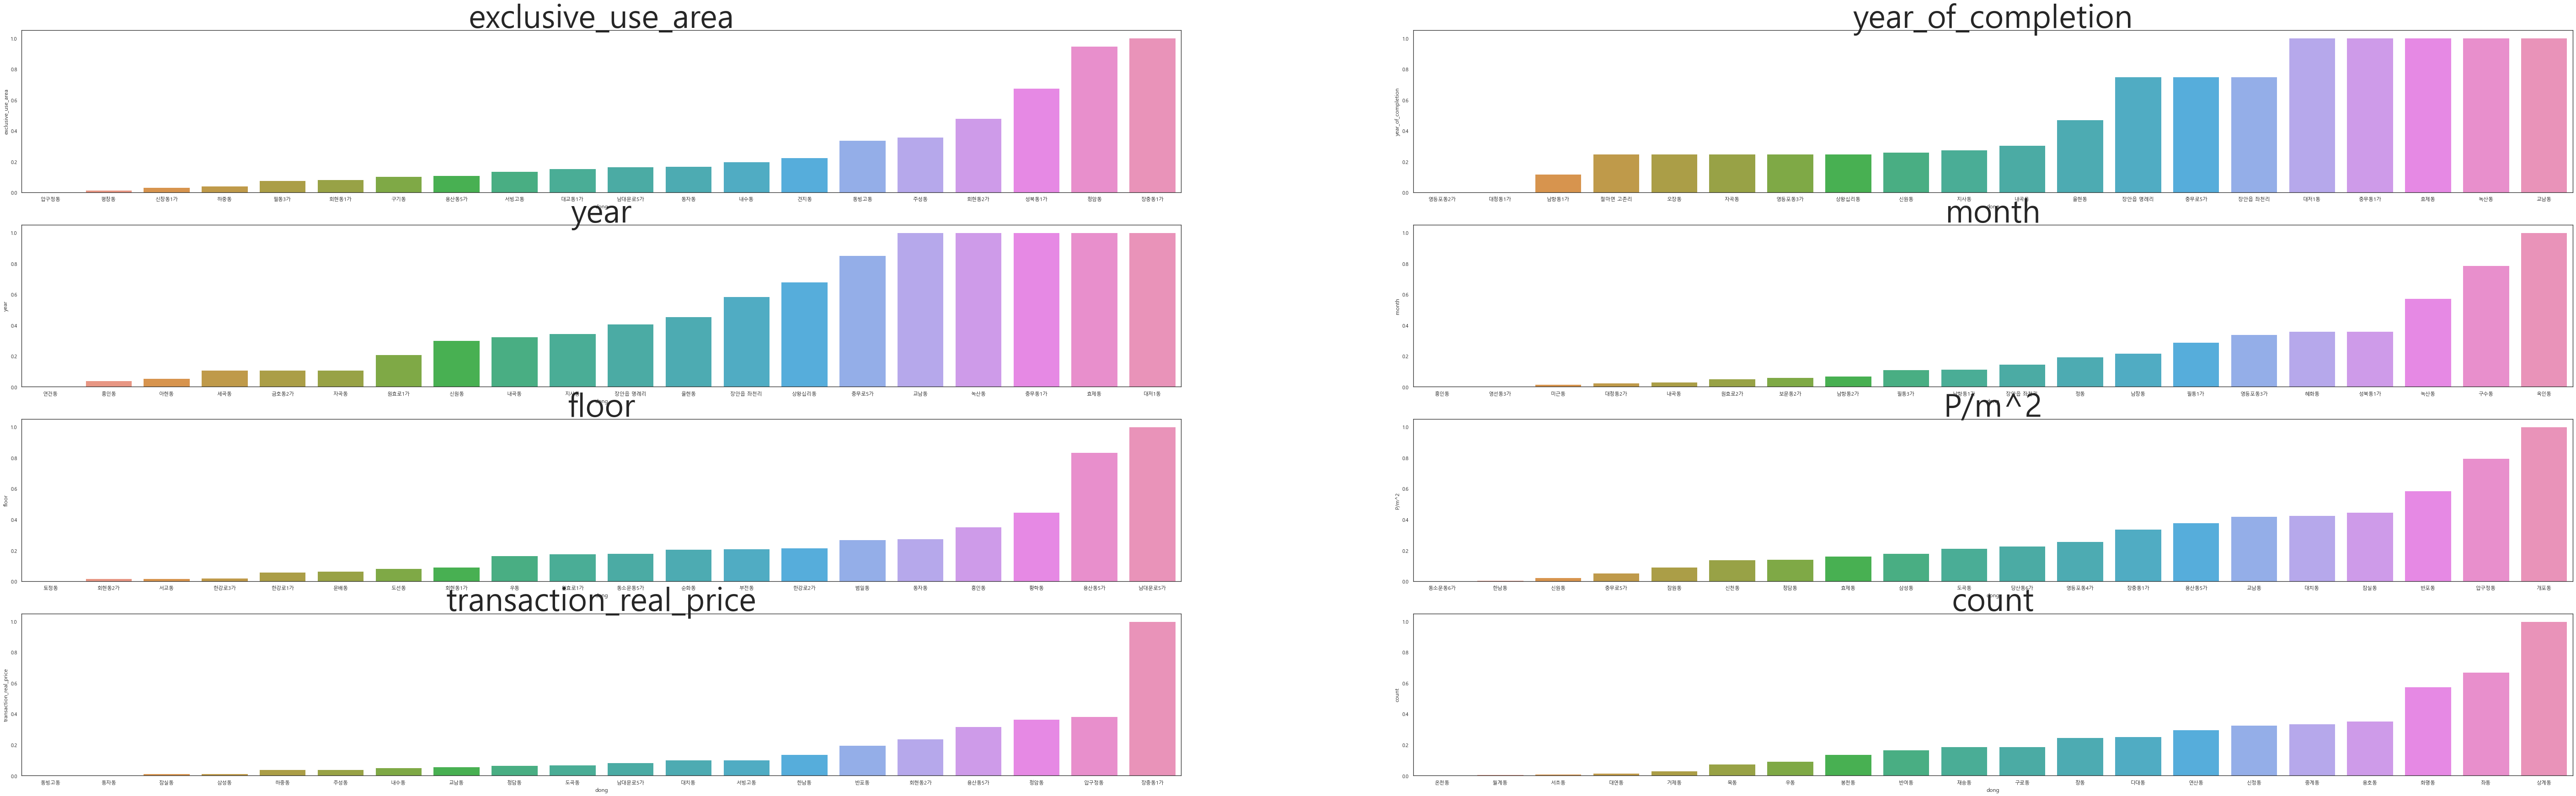

In [71]:
plt.figure(figsize=(100, 30))

for idx, data in zip(range(len(meandata.columns)) , meandata.columns):
    plt.subplot(4, 2, idx+1)
    a = meandata[[data]].sort_values(data).tail(20)
    a = (a-min(a.values)) / (max(a.values) - min(a.values))
    a = a.reset_index()
    sns.barplot(data = a, x='dong', y= data)
    plt.title(data, fontsize = 70)
    # plt.axis('off')
    
plt.show()

In [ ]:
# max - min이 가장 격차가 큰 곳을 확인함, 데이터의 정밀도를 위해서 비교해봄 장충동 1가가 면적의 차이가 큰 만큼, 가격의 큰 차이가 있었음
# 대치 1동, 효제동, 충무동1가, 녹산동, 교남동 등등의 데이터가 최근에 몰려있었음
# 준공년도가 최근으로 몰려있는 동역시 대치1동, 효제동 교남동 등등이 있었음

# 새로운 변수를 추가해보자

## 공원 Data

In [74]:
park.tail() #train data와  park data는 시와 동을 엮어 분석을 진행할 예정이다.

city   gu dong  park_name park_type  park_area park_exercise_facility  \
1354  서울특별시  구로구  천왕동  이펜시아어린이공원     어린이공원     1500.0                    NaN   
1355  서울특별시  구로구  천왕동      개명소공원       소공원     5415.0                    NaN   
1356  서울특별시  구로구  천왕동    봉화대근린공원      근린공원    60975.0                    NaN   
1357  서울특별시  구로구   항동      푸른수목원      근린공원   100809.0                    NaN   
1358  서울특별시  구로구  오류동   오류동역문화공원      문화공원     7510.0                    NaN   

     park_entertainment_facility park_benefit_facility park_cultural_facitiy  \
1354                     조합놀이 1기                   NaN                   NaN   
1355                         NaN                   NaN                   NaN   
1356                         NaN                   NaN                   NaN   
1357                         NaN                   NaN                   NaN   
1358                         NaN                   NaN                   NaN   

     park_facility_other  park_open_year reference_date  
1354                 NaN          2006.0     2019-02-25  
1355                 NaN          2006.0     2019-02-25  
1356                 NaN          2006.0     2019-02-25  
1357                 NaN          2005.0     2019-02-25  
1358                 NaN          2013.0     2019-02-25

In [75]:
park.info() # 공원 Datad에 null 값이 많다. 대략적으로 보니 각 공원별로 장비의 유무를 나타내는 것 같다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   city                         1359 non-null   object 
 1   gu                           1356 non-null   object 
 2   dong                         1359 non-null   object 
 3   park_name                    1359 non-null   object 
 4   park_type                    1359 non-null   object 
 5   park_area                    1359 non-null   float64
 6   park_exercise_facility       277 non-null    object 
 7   park_entertainment_facility  435 non-null    object 
 8   park_benefit_facility        266 non-null    object 
 9   park_cultural_facitiy        72 non-null     object 
 10  park_facility_other          175 non-null    object 
 11  park_open_year               937 non-null    float64
 12  reference_date               1359 non-null   object 
dtypes: float64(2), obj

In [76]:
park_df = pd.DataFrame(park, columns=["city","gu","dong","park_name","park_type","park_area","park_exercise_facility",
                                      "park_entertainment_facility","park_benefit_facility","park_cultural_facitiy","park_facility_other","park_open_year","reference_date"])
park_df.tail()

city   gu dong  park_name park_type  park_area park_exercise_facility  \
1354  서울특별시  구로구  천왕동  이펜시아어린이공원     어린이공원     1500.0                    NaN   
1355  서울특별시  구로구  천왕동      개명소공원       소공원     5415.0                    NaN   
1356  서울특별시  구로구  천왕동    봉화대근린공원      근린공원    60975.0                    NaN   
1357  서울특별시  구로구   항동      푸른수목원      근린공원   100809.0                    NaN   
1358  서울특별시  구로구  오류동   오류동역문화공원      문화공원     7510.0                    NaN   

     park_entertainment_facility park_benefit_facility park_cultural_facitiy  \
1354                     조합놀이 1기                   NaN                   NaN   
1355                         NaN                   NaN                   NaN   
1356                         NaN                   NaN                   NaN   
1357                         NaN                   NaN                   NaN   
1358                         NaN                   NaN                   NaN   

     park_facility_other  park_open_year reference_date  
1354                 NaN          2006.0     2019-02-25  
1355                 NaN          2006.0     2019-02-25  
1356                 NaN          2006.0     2019-02-25  
1357                 NaN          2005.0     2019-02-25  
1358                 NaN          2013.0     2019-02-25

In [77]:
park_rank = (park_df.groupby('dong')['park_area'].agg(['sum'])).sort_values(by='sum', ascending=False)
park_rank.head(10)

sum
dong             
초읍동     9956116.3
상계동     6692795.0
온천동     6346071.7
중계동     5334267.0
영주동     5249896.0
진관동     2956693.3
면목동     2801845.8
장전동     2332959.4
서대신동3가  2104835.0
용호동     1962663.0

In [78]:
# 새로운 x 값이 생겼다. 집값과의 상관관계를 밝혀보자

In [79]:
pd.pivot_table(park_df, index='dong',aggfunc="sum")[['park_area']].reset_index()

dong  park_area
0    가락동   102882.4
1    가산동     3650.6
2    가야동    72762.0
3    가양동   228304.5
4    갈현동     8312.8
..   ...        ...
232  회동동     9189.2
233  효창동   171802.0
234  후암동     2522.0
235  휘경동     6965.9
236  흑석동     2899.7

[237 rows x 2 columns]

In [80]:
park_count = park_df.groupby(['dong'])["park_area"].count().reset_index()

In [81]:
corr_park_count = pd.merge(park_count, df1)

In [82]:
park_sum = pd.merge(pd.pivot_table(park_df, index='dong')[['park_area']].reset_index(), df1)

In [83]:
# 동별 공원의 넓이 합과 집값의 상관관계를 보자

In [84]:
np.corrcoef(park_sum['park_area'], park_sum['transaction_real_price'])[0,1]

-0.074567797760041

In [85]:
# 동별 공원의 수와 집값의 상관관계를 보자

In [86]:
np.corrcoef(corr_park_count['park_area'], corr_park_count['transaction_real_price'])[0,1]

0.09527464647645059

# Test 데이터

In [87]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5463 entries, 0 to 5462
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_id          5463 non-null   int64  
 1   apartment_id            5463 non-null   int64  
 2   city                    5463 non-null   object 
 3   dong                    5463 non-null   object 
 4   jibun                   5463 non-null   object 
 5   apt                     5463 non-null   object 
 6   addr_kr                 5463 non-null   object 
 7   exclusive_use_area      5463 non-null   float64
 8   year_of_completion      5463 non-null   int64  
 9   transaction_year_month  5463 non-null   int64  
 10  transaction_date        5463 non-null   object 
 11  floor                   5463 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 512.3+ KB


In [ ]:
train.mean()

In [3]:
test.mean()

transaction_id            1.167126e+06
apartment_id              6.287571e+03
exclusive_use_area        7.949525e+01
year_of_completion        2.000431e+03
transaction_year_month    2.017102e+05
floor                     8.266886e+00
dtype: float64

# Regression

## linear regression
 - x1 : exclusive_use_area, x2 : year_of_completion, x3 : floor,
    - score =  0.3194554604195421
    - Mean_Squared_Error =  656071224.025548
    - RMSE =  25613.88732749381

 - x1 : exclusive_use_area, x2 : year_of_completion, x3 : floor, x4 : dong
    - score =  0.753000279857136
    - Mean_Squared_Error =  238117271.24869266
    - RMSE =  15431.04893546426

 - x1 : exclusive_use_area, x2 : apartment_id, x3 : floor, x4 : dong
    - score =  0.884690081565853
    - Mean_Squared_Error =  111163215.5273989
    - RMSE =  10543.396773687258

- x1 : exclusive_use_area, x2 : apartment_id, x3 : floor, x4 : dong, x5 : transaction_year_month
    - score =  0.9003701677303142
    - Mean_Squared_Error =  108359138.68998289
    - RMSE =  10409.569572752895
    
 <img src="./datas/dacon.png" style="width:150%;">

## Random Forest
 - columns
     - category : dong, apartment_id2, 
     - float : exclusive_use_area,year_of_completion,year, month, floor
 - params
     - n_estimators=100 
     - random_state=13 
     - max_depth=80 
     - max_leaf_nodes=5000

 - Mean squared error:  29631349.445886824
 - R2 score:  0.9692014870838667
 - RMSE score: 5443.468512436425

 
 
 <img src="./datas/RF.png" style="width:150%;">

## LGBM
 - columns
     - category : dong, apartment_id2, 
     - float : exclusive_use_area,year_of_completion,year, month, floor
 - params


In [27]:
best = pd.DataFrame([[100,5000,3688.88872155287],[40, 500, 3767.2188255416995], [40, 470, 3773.734609249986],[40, 440, 3779.8886402420894],[25, 100, 3975.145895653563], [25, 120, 3946.5334015130366],[10, 100, 4103.34157617724], [10, 120, 4064.319256966652], [10, 140, 4041.888347803674], [10, 160, 4023.3257594292195], [10, 180, 4008.309806856634],[15, 100, 3981.9591316680703], [15, 120, 3951.086582162809], [15, 140, 3927.07648125976],[25, 300, 3838.1515559441086], [25, 280, 3850.427535864345],[15, 300, 3836.975855985116],
 [15, 270, 3842.699696838895], [15, 240, 3856.147983271992], [15, 210, 3870.1379072696036],[70, 3000, 3663.809835262183], [60, 1000, 3740.97968704464], [60, 800, 3738.4109722560047], [60, 600, 3756.1232253862063],[70, 2500, 3670.7078738845394],[35, 100, 3961.4431866306863], [80, 5000, 3660.2213374375324], [80, 4500, 3665.869183414939], [80, 10000, 3699.4864508],[90, 5000, 3688.088936020], [80, 5000, 3692.060901569054]]).rename(columns={0:'max_depth', 1:'num_leaves', 2: 'RMSE'})

In [28]:
best.sort_values('RMSE')

max_depth  num_leaves         RMSE
26         80        5000  3660.221337
20         70        3000  3663.809835
27         80        4500  3665.869183
24         70        2500  3670.707874
29         90        5000  3688.088936
0         100        5000  3688.888722
30         80        5000  3692.060902
28         80       10000  3699.486451
22         60         800  3738.410972
21         60        1000  3740.979687
23         60         600  3756.123225
1          40         500  3767.218826
2          40         470  3773.734609
3          40         440  3779.888640
16         15         300  3836.975856
14         25         300  3838.151556
17         15         270  3842.699697
15         25         280  3850.427536
18         15         240  3856.147983
19         15         210  3870.137907
13         15         140  3927.076481
5          25         120  3946.533402
12         15         120  3951.086582
25         35         100  3961.443187
4          25         100  3975.145896
11         15         100  3981.959132
10         10         180  4008.309807
9          10         160  4023.325759
8          10         140  4041.888348
7          10         120  4064.319257
6          10         100  4103.341576

### y : 실거래가
- Mean squared error:  13631313.700894894
- R2 score:  0.9858895733066445
- RMSE score: 3692.060901569054

### y : 단위면적당
- Mean squared error:  1170.9034954098092
- R2 score:  0.9867032659809915
- RMSE score: 34.21846716920279


 
 <img src="./datas/dacon bests.png" style="width:150%;">